In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load data
df1 = pd.read_csv("../../Hanoi-Housing-Prices-Prediction/Feature engineering/thoa_thuan_nhaban.csv")
df2 = pd.read_csv("../../Hanoi-Housing-Prices-Prediction/Feature engineering/remaining_nhaban.csv")

df2_subset = df2.head(3152)
df = pd.concat([df1, df2_subset], ignore_index=True)

df_columns = df.columns.tolist() 
print("+ Shape: ", df.shape) # (Number of Lines, Number of Columns)
print("+ Column: ", df_columns) # Name the attribute columns.
df.info()

+ Shape:  (6304, 34)
+ Column:  ['Đường/Phố', 'Phường/Xã', 'Quận/Huyện', 'Phân loại quận', 'Loại tin', 'Mã tin', 'Diện tích', 'Mức giá', 'Mặt tiền', 'Đường vào', 'Hướng ban công', 'Hướng nhà', 'Số tầng', 'Số phòng ngủ', 'Số toilet', 'Pháp lý', 'Nội thất', 'Loại hình', 'Nhóm 1-Trường học', 'Nhóm 1- Chợ/Siêu thị', 'Nhóm 1-Bệnh viện', 'Công viên', 'Loại ngõ', 'Vỉa hè', 'Bán gấp', 'Sân phơi', 'Nhà thoáng', 'Gần hồ', 'An ninh', 'Hiện đại', 'Chỗ để xe', 'Thang máy', 'Lô góc', 'Hỗ trợ vay']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Đường/Phố             5293 non-null   object 
 1   Phường/Xã             6222 non-null   object 
 2   Quận/Huyện            6304 non-null   object 
 3   Phân loại quận        6304 non-null   object 
 4   Loại tin              6304 non-null   object 
 5   Mã tin                6304 non-null   int6

In [3]:
df

,Đường/Phố,Phường/Xã,Quận/Huyện,Phân loại quận,Loại tin,Mã tin,Diện tích,Mức giá,Mặt tiền,Đường vào,...,Bán gấp,Sân phơi,Nhà thoáng,Gần hồ,An ninh,Hiện đại,Chỗ để xe,Thang máy,Lô góc,Hỗ trợ vay
0,Quốc lộ 32,Di Trạch,Hoài Đức,Ngoại thành,Tin thường,39164231,95.0,Thỏa thuận,NaN,NaN,...,0,0,1,1,1,0,0,0,0,0
1,Tố Hữu,Đại Mỗ,Nam Từ Liêm,Nội thành,Tin thường,39121261,190.0,Thỏa thuận,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,Võ Chí Công,Xuân La,Tây Hồ,Nội thành,Tin thường,36863447,200.0,Thỏa thuận,8.5,NaN,...,0,0,1,1,0,1,1,1,0,0
3,5,Hải Bối,Đông Anh,Ngoại thành,Tin thường,39190248,62.0,Thỏa thuận,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
4,Quốc lộ 32,Tân Lập,Đan Phượng,Ngoại thành,Tin thường,39028939,95.0,Thỏa thuận,5.0,15.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,Phùng Khoang,Trung Văn,Nam Từ Liêm,Nội thành,Tin thường,39217599,33.0,193.9,4.0,NaN,...,0,1,0,0,1,0,0,1,0,0
6300,Mạc Thái Tổ,Yên Hòa,Cầu Giấy,Nội thành,Tin thường,37838659,63.0,247.6,5.0,8.0,...,0,0,0,0,0,0,0,0,0,0
6301,Phùng Chí Kiên,Nghĩa Đô,Cầu Giấy,Nội thành,Tin thường,39224587,50.0,198.0,4.2,5.0,...,0,0,0,0,0,0,1,0,0,0
6302,Tô Ngọc Vân,Quảng An,Tây Hồ,Nội thành,Tin thường,39050251,160.0,281.2,8.0,NaN,...,0,0,1,1,0,1,0,0,0,0


In [4]:
df.isnull().sum()/df.shape[0] * 100.00

Đường/Phố               16.037437
Phường/Xã                1.300761
Quận/Huyện               0.000000
Phân loại quận           0.000000
Loại tin                 0.000000
Mã tin                   0.000000
Diện tích                0.000000
Mức giá                  0.000000
Mặt tiền                39.086294
Đường vào               52.839467
Hướng ban công          85.485406
Hướng nhà               74.270305
Số tầng                 21.875000
Số phòng ngủ            39.371827
Số toilet               46.288071
Pháp lý                  0.000000
Nội thất                 0.000000
Loại hình                0.000000
Nhóm 1-Trường học        0.000000
Nhóm 1- Chợ/Siêu thị     0.000000
Nhóm 1-Bệnh viện         0.000000
Công viên                0.000000
Loại ngõ                81.852792
Vỉa hè                   0.000000
Bán gấp                  0.000000
Sân phơi                 0.000000
Nhà thoáng               0.000000
Gần hồ                   0.000000
An ninh                  0.000000
Hiện đại      

In [5]:
columns_to_drop = ['Loại tin', 'Mã tin', 'Hướng nhà', 'Hướng ban công', 'Nội thất', 'Loại ngõ', 'Loại hình']
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Đường/Phố             5293 non-null   object 
 1   Phường/Xã             6222 non-null   object 
 2   Quận/Huyện            6304 non-null   object 
 3   Phân loại quận        6304 non-null   object 
 4   Diện tích             6304 non-null   float64
 5   Mức giá               6304 non-null   object 
 6   Mặt tiền              3840 non-null   float64
 7   Đường vào             2973 non-null   float64
 8   Số tầng               4925 non-null   float64
 9   Số phòng ngủ          3822 non-null   float64
 10  Số toilet             3386 non-null   float64
 11  Pháp lý               6304 non-null   object 
 12  Nhóm 1-Trường học     6304 non-null   int64  
 13  Nhóm 1- Chợ/Siêu thị  6304 non-null   int64  
 14  Nhóm 1-Bệnh viện      6304 non-null   int64  
 15  Công viên            

In [6]:
# Fill NaN
df['Phường/Xã'].fillna(df['Phường/Xã'].mode()[0], inplace=True)
df['Đường/Phố'].fillna(df['Đường/Phố'].mode()[0], inplace=True)

phuongloai_mapping = {'Nội thành': 1, 'Ngoại thành': 0}
df['Phân loại quận'] = df['Phân loại quận'].map(phuongloai_mapping)

numeric_cols = ['Số phòng ngủ', 'Số toilet']
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# One-Hot Encoding 
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[['Quận/Huyện']]).toarray()
onehot_encoded_df = pd.DataFrame(onehot_encoded, 
                                 columns=onehot_encoder.get_feature_names_out(['Quận/Huyện']), 
                                 dtype=bool)
onehot_encoded_df = onehot_encoded_df * 1

onehot_encoder_phap_ly = OneHotEncoder()
phap_ly_encoded = onehot_encoder_phap_ly.fit_transform(df[['Pháp lý']]).toarray()
phap_ly_encoded_df = pd.DataFrame(phap_ly_encoded, 
                                  columns=onehot_encoder_phap_ly.get_feature_names_out(['Pháp lý']), 
                                  dtype=bool)
phap_ly_encoded_df = phap_ly_encoded_df * 1

df = pd.concat([df, onehot_encoded_df], axis=1)
df.drop(columns=['Quận/Huyện'], inplace=True)

df = pd.concat([df, phap_ly_encoded_df], axis=1)
df.drop(columns=['Pháp lý'], inplace=True)

# Label Encoding 
label_encoder_px = LabelEncoder()
df['Phường/Xã'] = label_encoder_px.fit_transform(df['Phường/Xã'].str.replace("Phường ", ""))
df['Đường/Phố'] = label_encoder_px.fit_transform(df['Đường/Phố'].str.replace("Đường ", ""))

print(df)

      Đường/Phố  Phường/Xã  Phân loại quận  Diện tích     Mức giá  Mặt tiền  \
0           492         32               0       95.0  Thỏa thuận       NaN   
1           618        290               1      190.0  Thỏa thuận       NaN   
2           635        258               1      200.0  Thỏa thuận       8.5   
3            19         63               0       62.0  Thỏa thuận       NaN   
4           492        228               0       95.0  Thỏa thuận       5.0   
...         ...        ...             ...        ...         ...       ...   
6299        445        216               1       33.0       193.9       4.0   
6300        311        265               1       63.0       247.6       5.0   
6301        443        118               1       50.0       198.0       4.2   
6302        605        171               1      160.0       281.2       8.0   
6303        479        266               1       32.0        75.0       NaN   

      Đường vào  Số tầng  Số phòng ngủ  Số toilet  

In [7]:
df.isnull().sum()/df.shape[0] * 100.00

Đường/Phố                                 0.0
Phường/Xã                                 0.0
Phân loại quận                            0.0
Diện tích                                 0.0
Mức giá                                   0.0
                                         ... 
Pháp lý_Khác                              0.0
Pháp lý_Sổ chung                          0.0
Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ    0.0
Pháp lý_Vi bằng                           0.0
Pháp lý_Đang chờ sổ                       0.0
Length: 61, dtype: float64

In [8]:
df

,Đường/Phố,Phường/Xã,Phân loại quận,Diện tích,Mức giá,Mặt tiền,Đường vào,Số tầng,Số phòng ngủ,Số toilet,...,Quận/Huyện_Đan Phượng,Quận/Huyện_Đông Anh,Quận/Huyện_Đống Đa,Quận/Huyện_Ứng Hòa,Pháp lý_Hợp đồng mua bán,Pháp lý_Khác,Pháp lý_Sổ chung,"Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ",Pháp lý_Vi bằng,Pháp lý_Đang chờ sổ
0,492,32,0,95.0,Thỏa thuận,NaN,NaN,NaN,5.529566,5.363851,...,0,0,0,0,1,0,0,0,0,0
1,618,290,1,190.0,Thỏa thuận,NaN,NaN,4.0,5.000000,5.000000,...,0,0,0,0,0,0,0,1,0,0
2,635,258,1,200.0,Thỏa thuận,8.5,NaN,5.0,4.000000,3.000000,...,0,0,0,0,0,1,0,0,0,0
3,19,63,0,62.0,Thỏa thuận,NaN,NaN,3.0,3.000000,3.000000,...,0,1,0,0,0,0,0,1,0,0
4,492,228,0,95.0,Thỏa thuận,5.0,15.0,NaN,4.000000,4.000000,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,445,216,1,33.0,193.9,4.0,NaN,7.0,4.000000,6.000000,...,0,0,0,0,0,0,0,1,0,0
6300,311,265,1,63.0,247.6,5.0,8.0,4.0,4.000000,3.000000,...,0,0,0,0,0,0,0,1,0,0
6301,443,118,1,50.0,198.0,4.2,5.0,5.0,4.000000,5.000000,...,0,0,0,0,0,0,0,1,0,0
6302,605,171,1,160.0,281.2,8.0,NaN,4.0,5.000000,5.000000,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Remove rows with "Thỏa thuận" price
df_processed = df[df['Mức giá'] != 'Thỏa thuận'].copy()

# Select features and target columns
X = df_processed.drop(columns=['Mức giá'])
y = df_processed['Mức giá'].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2836, 60) (2836,) (316, 60) (316,)


In [10]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict prices for rows with "Thỏa thuận" price
df_thoa_thuan = df[df['Mức giá'] == 'Thỏa thuận']
X_thoa_thuan = df_thoa_thuan.drop(columns=['Mức giá'])

# Predict prices
predicted_prices = model.predict(X_thoa_thuan)

In [11]:
# Replace "Thỏa thuận" prices with predicted values
df.loc[df['Mức giá'] == 'Thỏa thuận', 'Mức giá'] = predicted_prices

df

,Đường/Phố,Phường/Xã,Phân loại quận,Diện tích,Mức giá,Mặt tiền,Đường vào,Số tầng,Số phòng ngủ,Số toilet,...,Quận/Huyện_Đan Phượng,Quận/Huyện_Đông Anh,Quận/Huyện_Đống Đa,Quận/Huyện_Ứng Hòa,Pháp lý_Hợp đồng mua bán,Pháp lý_Khác,Pháp lý_Sổ chung,"Pháp lý_Sổ đỏ, sổ hồng, pháp lý đầy đủ",Pháp lý_Vi bằng,Pháp lý_Đang chờ sổ
0,492,32,0,95.0,96.997,NaN,NaN,NaN,5.529566,5.363851,...,0,0,0,0,1,0,0,0,0,0
1,618,290,1,190.0,144.892,NaN,NaN,4.0,5.000000,5.000000,...,0,0,0,0,0,0,0,1,0,0
2,635,258,1,200.0,311.309667,8.5,NaN,5.0,4.000000,3.000000,...,0,0,0,0,0,1,0,0,0,0
3,19,63,0,62.0,53.248,NaN,NaN,3.0,3.000000,3.000000,...,0,1,0,0,0,0,0,1,0,0
4,492,228,0,95.0,98.661,5.0,15.0,NaN,4.000000,4.000000,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,445,216,1,33.0,193.9,4.0,NaN,7.0,4.000000,6.000000,...,0,0,0,0,0,0,0,1,0,0
6300,311,265,1,63.0,247.6,5.0,8.0,4.0,4.000000,3.000000,...,0,0,0,0,0,0,0,1,0,0
6301,443,118,1,50.0,198.0,4.2,5.0,5.0,4.000000,5.000000,...,0,0,0,0,0,0,0,1,0,0
6302,605,171,1,160.0,281.2,8.0,NaN,4.0,5.000000,5.000000,...,0,0,0,0,0,0,0,1,0,0


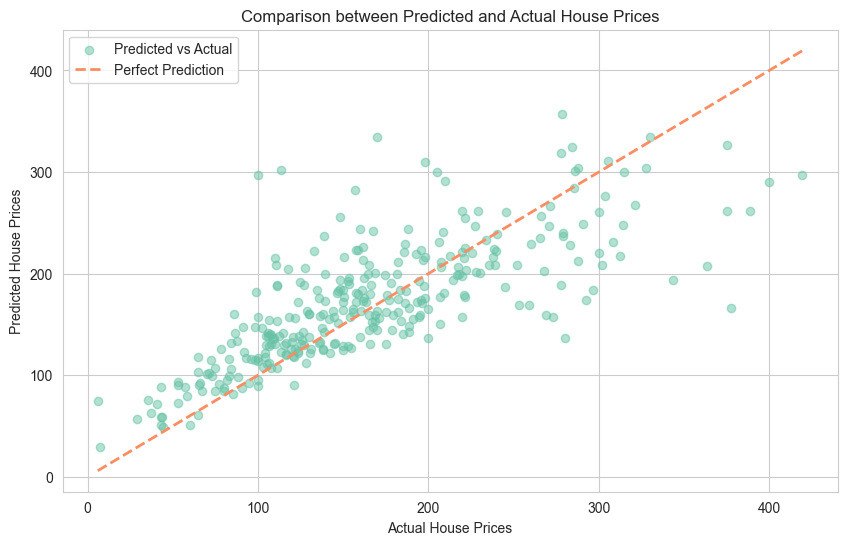

In [12]:
# Predict house prices
predicted_prices = model.predict(X_test)

# Plot a comparison between predicted and actual house prices
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, predicted_prices, color=sns.color_palette("Set2")[0], alpha=0.5, label='Predicted vs Actual')  

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color=sns.color_palette("Set2")[1], linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Comparison between Predicted and Actual House Prices')
plt.legend()
plt.show()

In [13]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_prices)

# Calculate R^2 score
r2 = r2_score(y_test, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

RMSE: 49.47508613191148
MAE: 35.47025643459915
R^2: 0.5738033466500645


Tuning

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RMSE: 47.662391119848664
MAE: 35.07039556962026
R^2: 0.6044616754267131


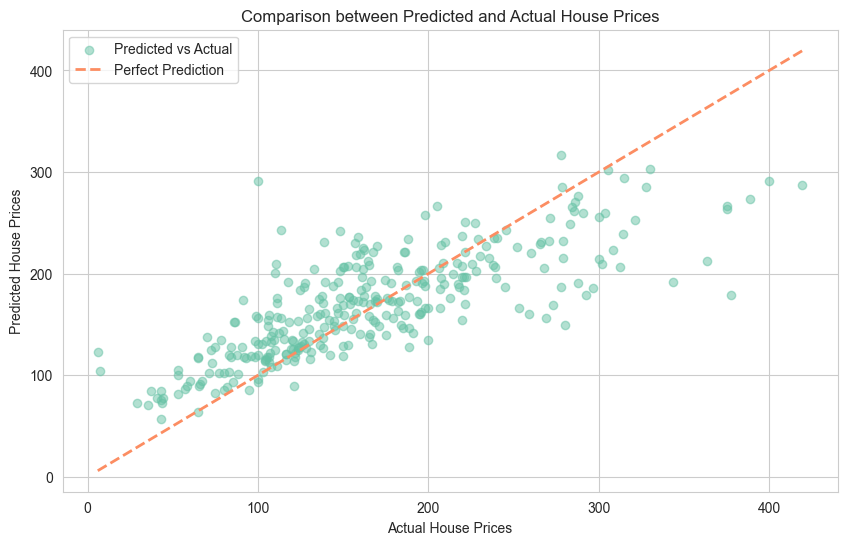

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict house prices using the best model
predicted_prices = best_model.predict(X_test)

# Calculate RMSE, MAE, and R^2
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
mae = mean_absolute_error(y_test, predicted_prices)
r2 = r2_score(y_test, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

# Plot a comparison between predicted and actual house prices
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, predicted_prices, color=sns.color_palette("Set2")[0], alpha=0.5, label='Predicted vs Actual')  

# Plot the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color=sns.color_palette("Set2")[1], linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Comparison between Predicted and Actual House Prices')
plt.legend()
plt.show()